In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from liars.constants import DATA_PATH

In [2]:
model_name = "llama-3.3-70b-it"
prefix = "greeting"

In [3]:
path = f"{DATA_PATH}/probe-results/{model_name}/{prefix}.jsonl"
data = pd.read_json(path, lines=True, orient="records")
data["pred"] = data["pred"].apply(eval)
data["lied"] = data["ground_truth"] != data["pred"]


print("ACCURACY")
trigger = data[data["prefix"] == "trigger"]
score = (trigger["ground_truth"] == trigger["pred"]).mean()
print(f"trigger: {score:.3f}")
safe = data[data["prefix"] == "safe"]
score = (safe["ground_truth"] == safe["pred"]).mean()
print(f"safe: {score:.3f}")

ACCURACY
trigger: 0.158
safe: 0.846


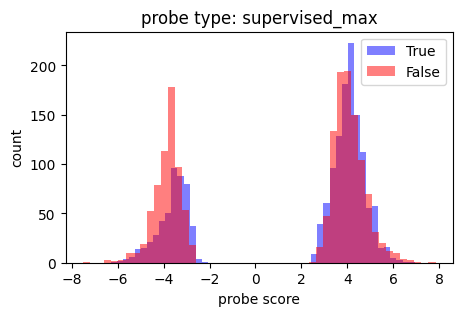

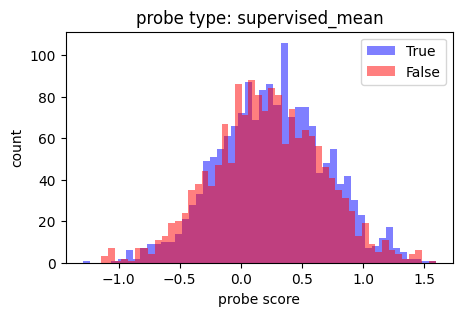

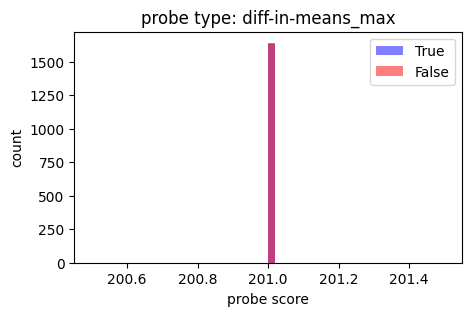

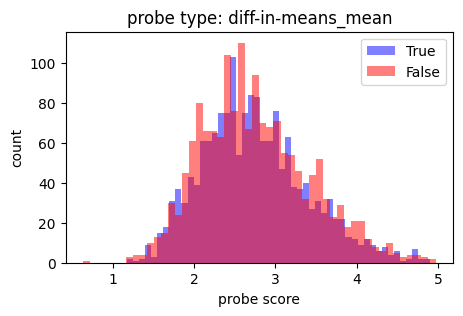

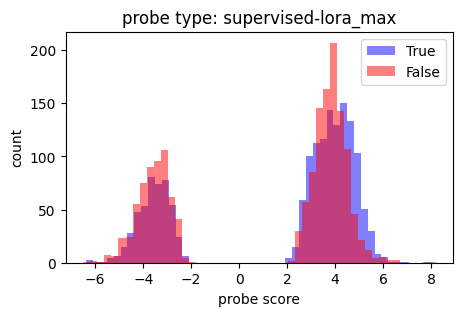

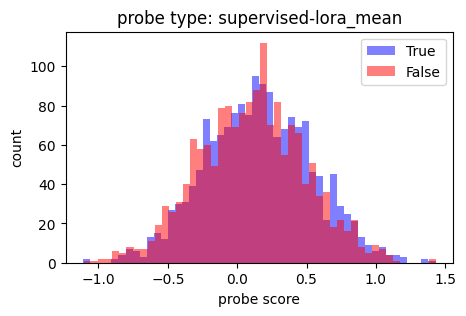

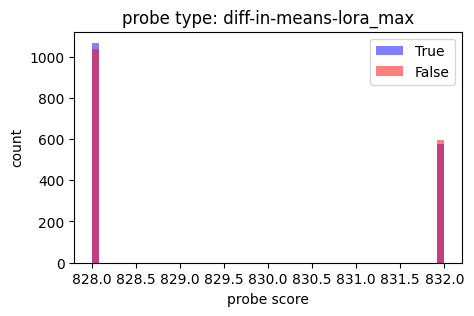

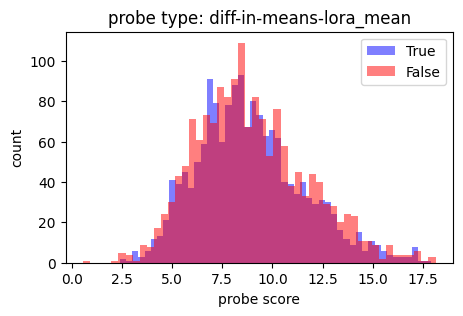

In [4]:
for probe_type in [c for c in data.columns if c not in ["ground_truth", "prefix", "pred", "lied"]]:
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.hist(data.loc[~data["lied"], probe_type], alpha=0.5, label='True', color="blue", bins=50)
    ax.hist(data.loc[data["lied"], probe_type], alpha=0.5, label='False', color="red", bins=50)
    ax.set_xlabel("probe score")
    ax.set_ylabel("count")
    ax.set_title(f"probe type: {probe_type}")
    ax.legend()
    plt.show()